In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

In [2]:
df = pd.read_csv('Data/emision-co2-autos_limpio.csv')

#link http://datos.ambiente.gob.ar/dataset?tags=CO2&tags=Emisiones

In [3]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_potencia,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,lca_numero,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
0,TOYOTA,LAND CRUISER 200,SUV,4x4,TOYOTA 1VD-FTV,4461.0,NaN,AUTOMATICA,GAS OIL,EURO V,NaN,04/10/2017,H1860666086/241,VINÇOTTE nv,260.70,11.56,8.94,9.90,000001A
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,RENAULT M4RK7,1997.0,NaN,CVT,NAFTA,EURO V,NaN,22/06/2016,09/09790,UTAC,175.40,10.50,6.10,7.70,000178A
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0210/17,DELPHI,198.86,11.13,6.98,8.52,000650C
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0209/17,DELPHI,199.74,11.20,7.01,8.55,000659C
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,CITROËN EP6CDTM (5FM),1598.0,NaN,AUTOMATICA,NAFTA,EURO V,NaN,11/10/2011,11/04511,UTAC,177.60,10.60,6.00,7.70,000106A


In [4]:
df.dtypes

vehiculo_marca                object
vehiculo_modelo               object
vehiculo_tipo                 object
vehiculo_traccion             object
vehiculo_id_motor             object
vehiculo_cilindrada          float64
vehiculo_potencia             object
vehiculo_tipo_transmision     object
vehiculo_tipo_combustible     object
vehiculo_standard_emision     object
lca_numero                   float64
fecha_firma                   object
ensayo_gei_numero             object
ensayo_gei_laboratorio        object
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
id_etiqueta                   object
dtype: object

In [5]:
df.shape

(432, 19)

In [6]:
# Total de datos faltantes
df.isna().any(axis=1).sum()

332

In [7]:
# Datos faltantes por columna
df.isna().sum()

vehiculo_marca                20
vehiculo_modelo               20
vehiculo_tipo                 20
vehiculo_traccion             20
vehiculo_id_motor             20
vehiculo_cilindrada           21
vehiculo_potencia            307
vehiculo_tipo_transmision     15
vehiculo_tipo_combustible     14
vehiculo_standard_emision     21
lca_numero                   139
fecha_firma                   28
ensayo_gei_numero             20
ensayo_gei_laboratorio        20
emision_CO2                   20
consumo_urbano                22
consumo_extraurbano           22
consumo_mixto                 20
id_etiqueta                   20
dtype: int64

In [8]:
# Elimino las columnas con mayor cantidad de datos faltantes y las que considero que no voy a utilizar para el análisis
df.drop(['vehiculo_potencia','lca_numero', 'vehiculo_id_motor','vehiculo_id_motor','fecha_firma','ensayo_gei_numero','ensayo_gei_laboratorio','id_etiqueta'], axis=1, inplace=True)

In [9]:
df.shape

(432, 12)

In [10]:
df.isna().any(axis=1).sum()

26

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum()

vehiculo_marca               0
vehiculo_modelo              0
vehiculo_tipo                0
vehiculo_traccion            0
vehiculo_cilindrada          0
vehiculo_tipo_transmision    0
vehiculo_tipo_combustible    0
vehiculo_standard_emision    0
emision_CO2                  0
consumo_urbano               0
consumo_extraurbano          0
consumo_mixto                0
dtype: int64

In [13]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


In [14]:
df['vehiculo_marca'].value_counts()

MERCEDES-BENZ        31
HYUNDAI              31
CHEVROLET            25
BMW                  23
AUDI                 21
TOYOTA               20
FORD                 18
RENAULT              17
FIAT                 17
MINI                 16
VOLKSWAGEN           15
HONDA                15
PEUGEOT              13
NISSAN               12
CITROËN              10
CHANGAN               9
LEXUS                 8
LIFAN                 8
JEEP                  7
SUZUKI                7
LAND ROVER            6
PEUGEOT / CITROËN     6
FAW                   5
MASERATI              4
BORGWARD              4
BAIC                  4
ZOTYE                 4
DOMY                  4
JAC                   4
ALFA ROMEO            4
KIA                   3
HAVAL                 3
MITSUBISHI            3
DS                    3
PORSCHE               3
VOLVO                 2
FOTON                 2
CITROËN / DS          2
ZANELLA               2
SUBARU                2
MERCEDES-AMG          2
RAM             

In [15]:
df['vehiculo_tipo'].value_counts()

SEDÁN 4 PUERTAS                                            39
SEDÁN 5 PUERTAS                                            38
RURAL                                                      29
SUV                                                        28
BERLINA                                                    21
                                                           ..
SEDÁN 5 PUERTAS / COUPÉ                                     1
CHASIS CON CABINA SIMPLE                                    1
MONOVOLÚMEN 4 PUERTAS Y PORTÓN TRASERO (5 / 7 ASIENTOS)     1
DE CARGA CABINA DOBLE                                       1
PICK UP CABINA SIMPLE DOBLE                                 1
Name: vehiculo_tipo, Length: 98, dtype: int64

In [16]:
df['vehiculo_traccion'].value_counts()

4x2          286
4x4           95
4x2 - 4x4     25
Name: vehiculo_traccion, dtype: int64

In [17]:
df['vehiculo_tipo_transmision'].value_counts()

AUTOMATICA                                     223
MANUAL                                         147
CVT                                             33
E-CVT (Hibrida controlada electrónicamente)      1
CTT                                              1
MANUAL AUTOMATIZADA                              1
Name: vehiculo_tipo_transmision, dtype: int64

In [18]:
df['vehiculo_tipo_combustible'].value_counts()

NAFTA                   316
GAS OIL                  61
NAFTA / ELECTRICIDAD     25
DIESEL                    4
Name: vehiculo_tipo_combustible, dtype: int64

In [19]:
df['vehiculo_standard_emision'].value_counts()

EURO V        264
EURO VI b      49
EURO VI c      39
EURO VI        24
EURO  V        18
EURO VI d       5
EURO VI a       5
EURO  VI b      1
EURUO V         1
Name: vehiculo_standard_emision, dtype: int64

In [20]:
df.columns


Index(['vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_cilindrada', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'emision_CO2',
       'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto'],
      dtype='object')

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [22]:
feature_cols = [ 'vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']

In [23]:
X = df[feature_cols]
y = df.emision_CO2

In [24]:
# Instanciamos el modelo
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=40)

# Entrenamos el modelo 
linreg.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = linreg.predict(X_test)

In [26]:
print ('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.9140232414926369


In [27]:
# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

9.375827227885566
[7.49369982e-03 8.97130258e-01 2.29124687e+01 5.35363191e-04]


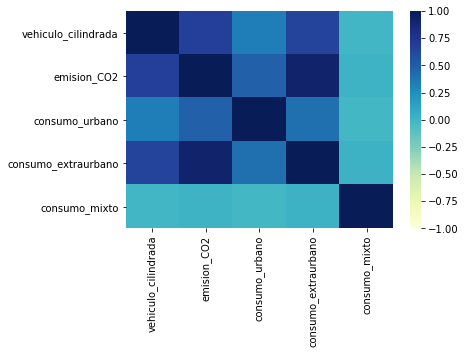

In [28]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

In [29]:
from sklearn import metrics
#print ('MAE:', metrics.mean_absolute_error(true, pred))
#print ('MSE:', metrics.mean_squared_error(true, pred))
#print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.9140232414926369


In [30]:
from sklearn.model_selection import train_test_split

def train_test_rmse(feature_cols):
    X = df[feature_cols]
    y = df.emision_CO2
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [31]:
print (train_test_rmse([ 'vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']))

11.324192623695467


In [32]:
print ('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.9140232414926369


In [ ]:
import json
import pickle
from flask import  Flask, request, jsonify, render_template
